# Feature Selection Using Pearson Correlation and Filtering Method

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

### Load Dataset for Modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (110521, 29)


appointment_id       patient_id  repeat_patient_yn  gender_yn  \
0         5698125  678814354693913                  1          0   
1         5698246   54593736353128                  0          0   
2         5699393    4369164743113                  1          0   
3         5694371   54523365344664                  0          1   
4         5698279   62917816238835                  1          0   

   time_between_sch_appt  same_day_appt_yn  within_week_appt_yn  \
0                      0                 1                    0   
1                      0                 1                    0   
2                      0                 1                    0   
3                      3                 0                    1   
4                      0                 1                    0   

   advanced_appt_yn  monday_yn  tuesday_yn  ...  young_adult_yn  adult_yn  \
0                 0          1           0  ...               0         0   
1                 0          1           0  ...               1         0   
2                 0          1           0  ...               0         1   
3                 0          1           0  ...               0         0   
4                 0          1           0  ...               1         0   

   senior_yn  welfare_assistance  hypertension  diabetes  alcoholism  \
0          1                   0             0         0           0   
1          0                   1             0         0           0   
2          0                   0             1         0           0   
3          0                   0             0         0           0   
4          0                   1             0         0           0   

   handicap_yn  sms_received  no_show_yn  
0            0             0           0  
1            0             0           0  
2            0             0           0  
3            0             0           1  
4            0             0           0  

[5 rows x 29 columns]

### Drop Irrelevant Columns

In [3]:
data = data.drop(['appointment_id', 'patient_id', 'time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {data.shape}")

Shape of the data is: (110521, 26)


In [4]:
# label_encoder = LabelEncoder()
# data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')


### Generate Correlation Matrix

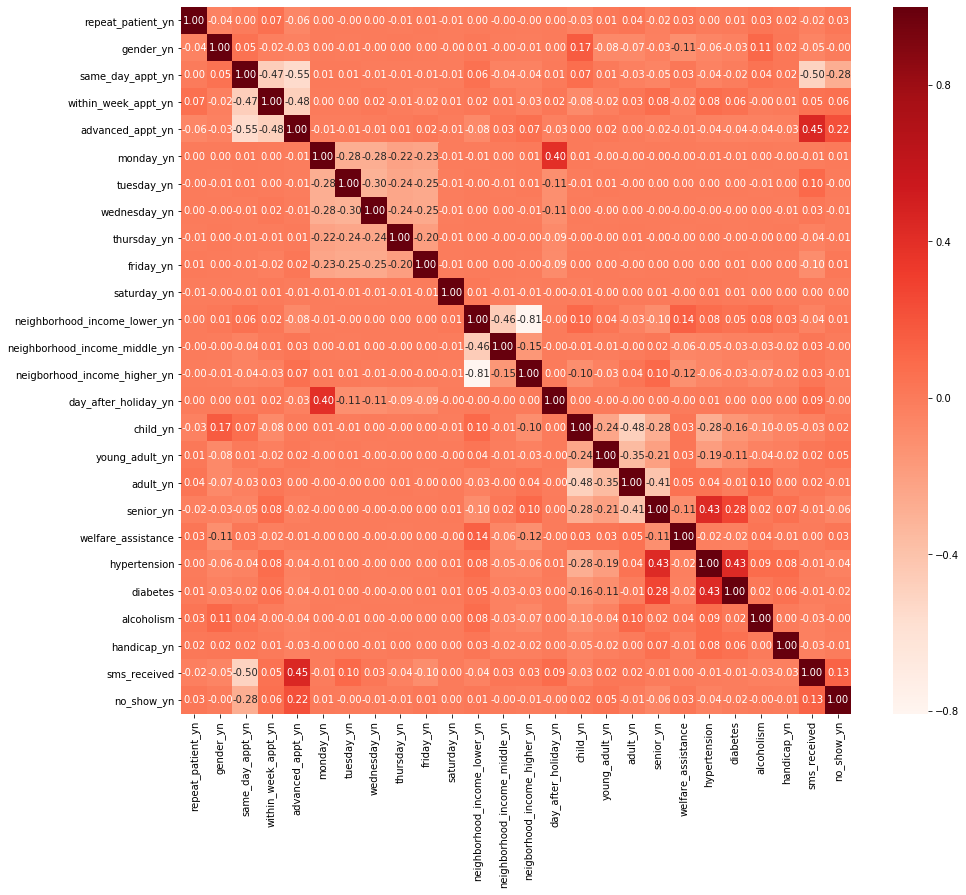

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(15,13))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".2f", cmap=plt.cm.Reds)

plt.savefig('..\images\correlation_matrix.png')


In [6]:
#check out correlation data
corr

repeat_patient_yn  gender_yn  same_day_appt_yn  \
repeat_patient_yn                       1.000000  -0.038842          0.003107   
gender_yn                              -0.038842   1.000000          0.051675   
same_day_appt_yn                        0.003107   0.051675          1.000000   
within_week_appt_yn                     0.065389  -0.020189         -0.469227   
advanced_appt_yn                       -0.064981  -0.032205         -0.548887   
monday_yn                               0.001598   0.004080          0.009734   
tuesday_yn                             -0.000386  -0.009389          0.010372   
wednesday_yn                            0.001606  -0.002272         -0.009099   
thursday_yn                            -0.008921   0.004835         -0.005039   
friday_yn                               0.005830   0.004216         -0.006686   
saturday_yn                            -0.006717  -0.003687         -0.005668   
neighborhood_income_lower_yn            0.003188   0.011818          0.058722   
neighborhood_income_middle_yn          -0.001102  -0.004313         -0.039207   
neigborhood_income_higher_yn           -0.002812  -0.010275         -0.039254   
day_after_holiday_yn                    0.003755   0.002461          0.005954   
child_yn                               -0.034814   0.171247          0.072978   
young_adult_yn                          0.013813  -0.075875          0.006148   
adult_yn                                0.035102  -0.074795         -0.027389   
senior_yn                              -0.018250  -0.025293         -0.051430   
welfare_assistance                      0.026790  -0.114297          0.025539   
hypertension                            0.000142  -0.055721         -0.039959   
diabetes                                0.006882  -0.032555         -0.015097   
alcoholism                              0.034060   0.106170          0.040431   
handicap_yn                             0.015044   0.022391          0.020318   
sms_received                           -0.021882  -0.046301         -0.503382   
no_show_yn                              0.025495  -0.004132         -0.283446   

                               within_week_appt_yn  advanced_appt_yn  \
repeat_patient_yn                         0.065389         -0.064981   
gender_yn                                -0.020189         -0.032205   
same_day_appt_yn                         -0.469227         -0.548887   
within_week_appt_yn                       1.000000         -0.480609   
advanced_appt_yn                         -0.480609          1.000000   
monday_yn                                 0.001119         -0.010725   
tuesday_yn                                0.003440         -0.013556   
wednesday_yn                              0.016864         -0.006927   
thursday_yn                              -0.006379          0.011042   
friday_yn                                -0.018391          0.024048   
saturday_yn                               0.011285         -0.005054   
neighborhood_income_lower_yn              0.022148         -0.079278   
neighborhood_income_middle_yn             0.008601          0.030793   
neigborhood_income_higher_yn             -0.030327          0.067688   
day_after_holiday_yn                      0.024578         -0.029178   
child_yn                                 -0.081740          0.004903   
young_adult_yn                           -0.022598          0.015286   
adult_yn                                  0.027420          0.001243   
senior_yn                                 0.075985         -0.020853   
welfare_assistance                       -0.021198         -0.005296   
hypertension                              0.081043         -0.037032   
diabetes                                  0.056438         -0.038430   
alcoholism                               -0.003303         -0.037023   
handicap_yn                               0.008478         -0.028202   
sms_received                              0

In [7]:
corr_matrix_df = pd.DataFrame(corr)

In [8]:
#Export to csv 
corr_matrix_df.to_csv('../data/cleanData/modelResults/corr_matrix_df.csv', index = False, header=True)

In [13]:
# check out the more highly correlated features
#Correlation with output variable
corr_target = abs(corr['no_show_yn'])

#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

no_show_yn    1.0
Name: no_show_yn, dtype: float64

### Remove Columns with Correlation Extremes

From looking through our Correlation Matrix data, it appears that the the most extreme correlation values are less than 0.8. Let's remove those columns.

In [9]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.8:
            if columns[j]:
                columns[j] = False

### View Columns Selected

In [10]:
selected_columns = data.columns[columns]
selected_columns.shape

(25,)

In [11]:
data = data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 25 columns):
repeat_patient_yn                110521 non-null int64
gender_yn                        110521 non-null int64
same_day_appt_yn                 110521 non-null int64
within_week_appt_yn              110521 non-null int64
advanced_appt_yn                 110521 non-null int64
monday_yn                        110521 non-null int64
tuesday_yn                       110521 non-null int64
wednesday_yn                     110521 non-null int64
thursday_yn                      110521 non-null int64
friday_yn                        110521 non-null int64
saturday_yn                      110521 non-null int64
neighborhood_income_lower_yn     110521 non-null int64
neighborhood_income_middle_yn    110521 non-null int64
day_after_holiday_yn             110521 non-null int64
child_yn                         110521 non-null int64
young_adult_yn                   110521 non-null int64
adult_yn 

It appears that higher income neighborhood data was removed. We now have 25 columns of data.

In [12]:
# Remove target column
selected_columns = selected_columns[:1].values
selected_columns

array(['repeat_patient_yn'], dtype=object)

### Select Columns based on p-value

In [13]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [18]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,:1].values, data.iloc[:,0].values, SL, selected_columns)

In [19]:
#move results to dataframe
result = pd.DataFrame()
result['noshow'] = data.iloc[:,0]

In [20]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.head()

repeat_patient_yn
0                1.0
1                0.0
2                1.0
3                0.0
4                1.0

### Plot selected columns to see distributions

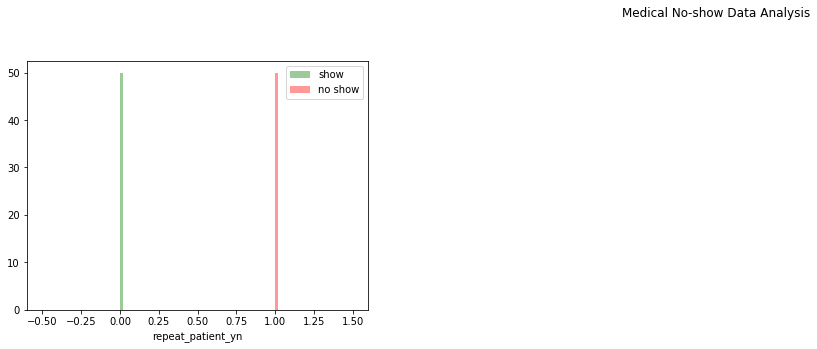

In [21]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['noshow']==0], color='g', label = 'show')
    sns.distplot(data[i][result['noshow']==1], color='r', label = 'no show')
    plt.legend(loc='best')
fig.suptitle('Medical No-show Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


### Build SVC Model 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [23]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
prediction = svc.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

1.0
